# Hotel Reservation project #

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('Hotel_Reservations.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [2]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [3]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
df.describe(include = ['object'])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


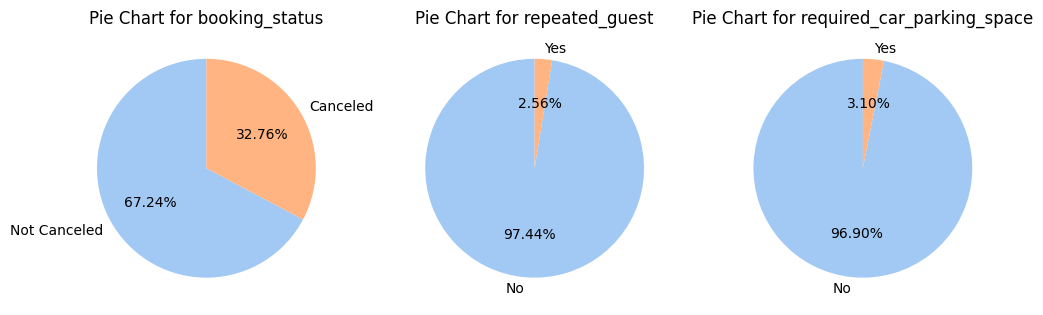

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel')
dx=df.copy(deep=True)
list_of_columns=['booking_status', 'repeated_guest', 'required_car_parking_space']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(list_of_columns):
    
    if column == 'booking_status':
        column_values = dx[column].replace({'Canceled': 'Canceled', 'Not_Canceled': 'Not Canceled'}, inplace=True)

    else:
        column_values = dx[column].replace({0: 'No', 1: 'Yes'}, inplace=True)
        
    dx[column].value_counts().plot.pie(ax=axes[i], autopct='%1.2f%%', startangle=90)
    axes[i].set_title(f'Pie Chart for {column}')
    axes[i].set_ylabel('')

In [5]:
dx.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00,0,Not Canceled
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68,1,Not Canceled
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50,0,Canceled


In [6]:
dx.rename(columns={'arrival_year':'year', 'arrival_month': 'month', 'arrival_date':'day'}, inplace=True)
dx['booking_date']=pd.to_datetime(dx[['year', 'month','day']], errors='coerce')

In [7]:
dx.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_date
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00,0,Not Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68,1,Not Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50,0,Canceled,2018-04-11


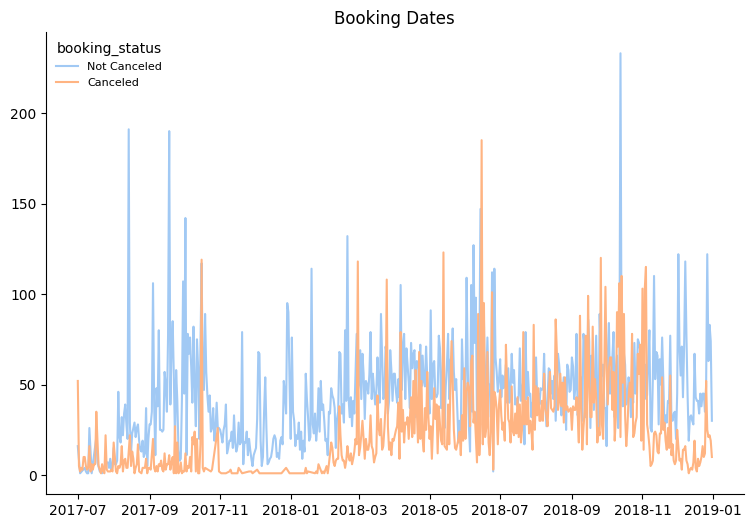

In [27]:
plt.figure(figsize=(9,6))
plt.title('Booking Dates')
plt.plot(dx[dx['booking_status']=='Not Canceled'].groupby('booking_date')['Booking_ID'].agg(['count']),label='Not Canceled')
plt.plot(dx[dx['booking_status']=='Canceled'].groupby('booking_date')['Booking_ID'].agg(['count']), label='Canceled')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left', title='booking_status', fontsize=8, frameon=False);

Reletive Plot Of Some Selected Features: A Data Subset


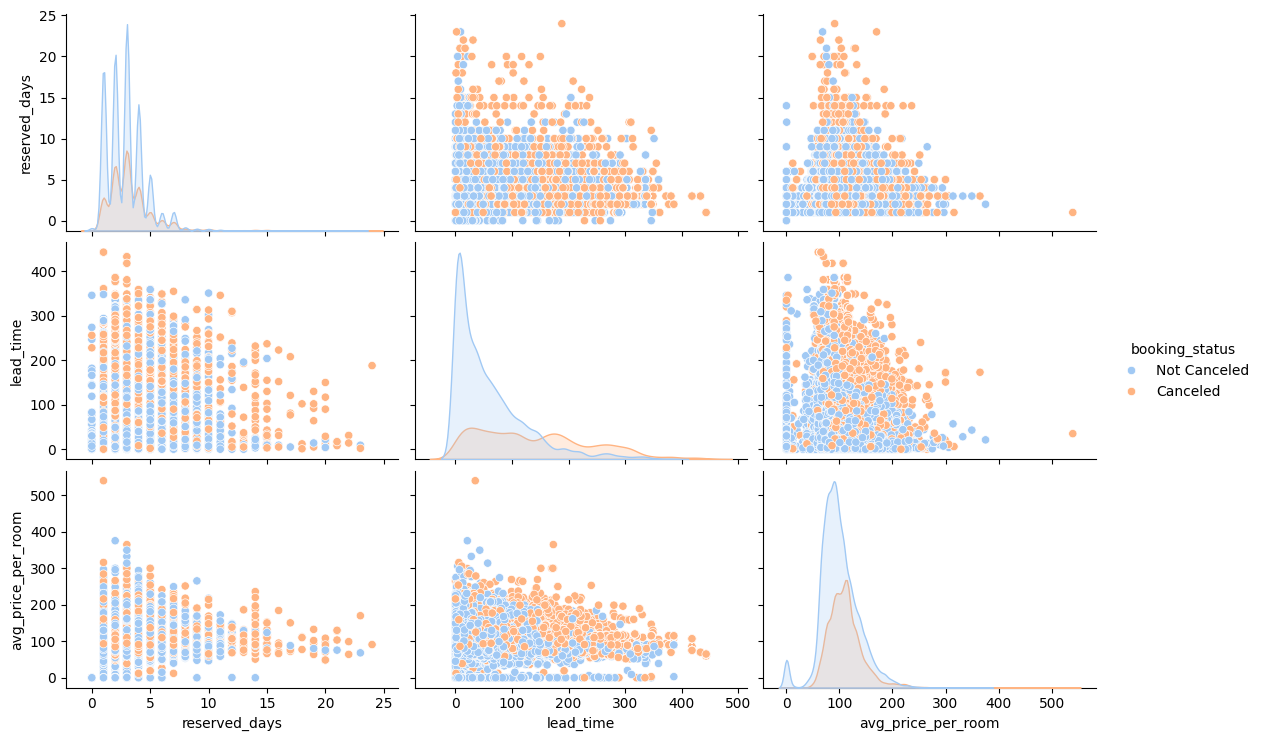

In [28]:
dx['reserved_days']=dx['no_of_weekend_nights'] + dx ['no_of_week_nights']
to_plot=['reserved_days','lead_time', 'avg_price_per_room','booking_status']
print('Reletive Plot Of Some Selected Features: A Data Subset')
sns.pairplot(dx[to_plot], hue='booking_status',palette='pastel', height=2.5, aspect=1.5);

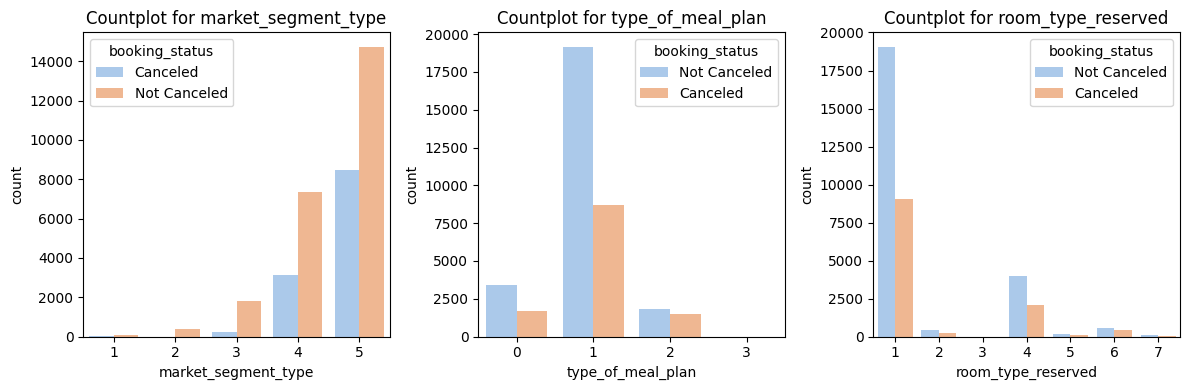

In [33]:
#create a name dictionnaries for the subsets
room_type={'Room_Type 1': 1, 'Room_Type 2' : 2, 'Room_Type 3':3, 
            'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6, 'Room_Type 7':7}
market_segment_type={'Aviation':1, 'Complementary':2, 'Corporate':3, 'Offline':4, 'Online':5}

meal_plan_type={'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3, 'Not Selected':0}
replace_dict={**room_type, **market_segment_type, **meal_plan_type}
dx.replace(replace_dict, inplace=True)



list_of_columns = ['market_segment_type', 'type_of_meal_plan', 'room_type_reserved']
to_plot = 'booking_status'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Iterate through the list of columns and create countplots
for i, column in enumerate(list_of_columns):
    sns.countplot(data=dx, x=column, hue=to_plot, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Countplot for {column}')
# Adjust layout
plt.tight_layout();

In [34]:
dx=dx.drop(labels=['Booking_ID','reserved_days','booking_date'], axis=1)

dx.replace({'No': 0, 'Yes':1, 'Not Canceled':0, 'Canceled':1}, inplace=True)

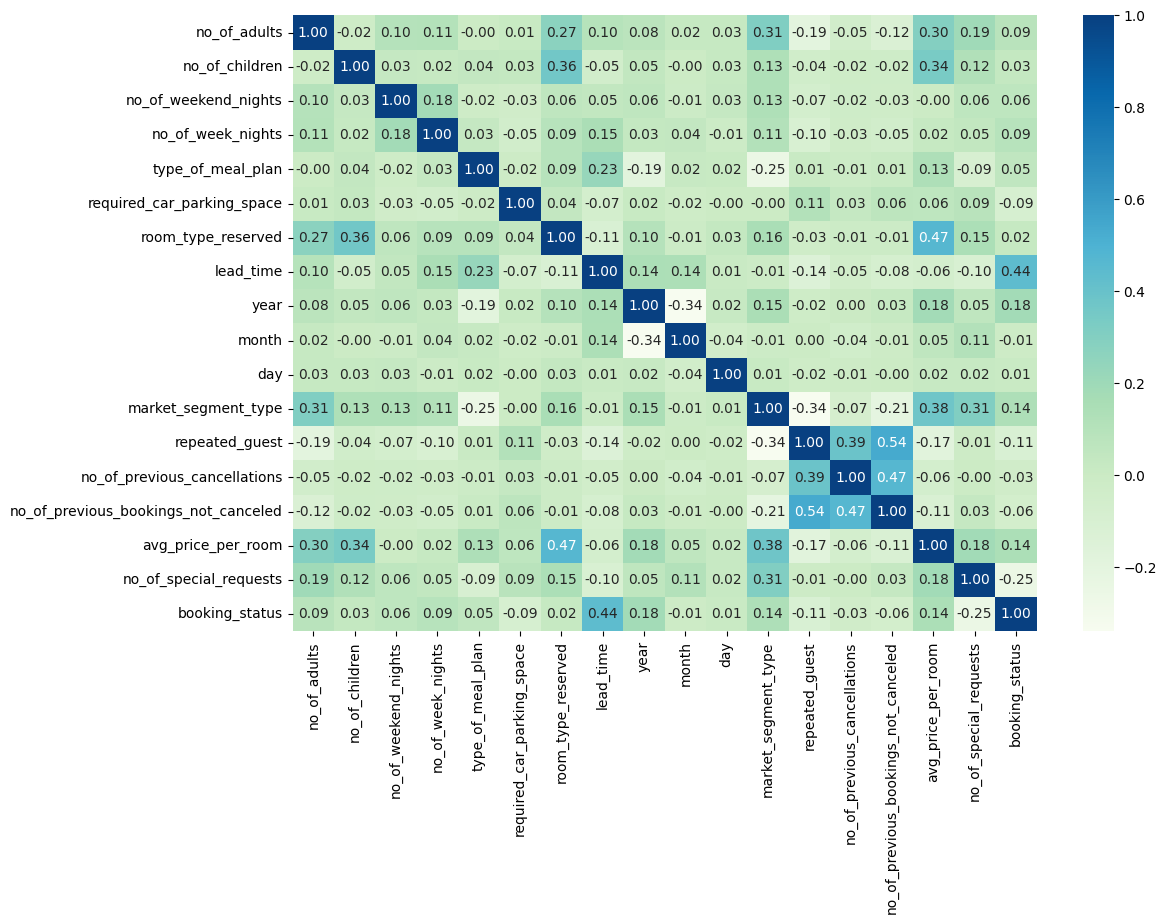

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(dx.corr(), annot = True, cmap= 'GnBu', fmt= '.2f');

## Prediction

In [41]:
y=dx['booking_status']
X=dx.drop(labels='booking_status', axis=1)

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=100)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

clf=RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_prob=clf.predict_proba(X_test)[:, 1]
print('Test set AUC score: ', roc_auc_score(y_test, y_prob))

Test set AUC score:  0.9537261284582715


In [62]:
feature_names=clf.feature_names_in_
feature_importances=clf.feature_importances_

feature_importance_dict=dict(zip(feature_names, feature_importances))

sorted_indice=np.argsort(feature_importances)[::-1]

top_five=[feature_names[i]for i in sorted_indice[:5]]

print("Top 5 most important features:")
for feature_name in top_five:
    print(feature_name, feature_importance_dict[feature_name])

Top 5 most important features:
lead_time 0.3251833632952885
avg_price_per_room 0.16218319981358312
no_of_special_requests 0.09733569890298625
day 0.09157172299902917
month 0.0781893206431501


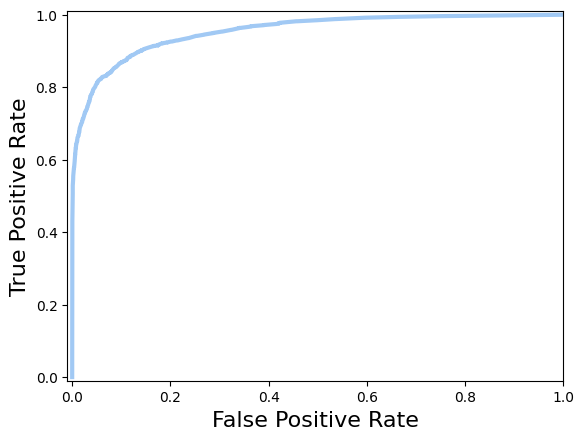

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.show()